In [1]:
#讀檔相關
import os
import urllib.request 
import pandas as pd
import numpy as np


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


In [2]:
def index_2d(myList, v):
    for i, x in enumerate(myList):
        if v in x:
            return (i, x.index(v))

In [3]:
documents = []
data_path = data_path = os.path.abspath(os.getcwd()) +"/data/"
for i in range(1,1096):
    f = open(data_path + str(i)+'.txt', 'r')
    text = ""
    for line in f.readlines():
        text = text + (line.strip ('\n'))
    documents.append(text)
    f.close()

In [4]:
len(documents)

1095

In [5]:
TFIDF_vectorizer = TfidfVectorizer(lowercase = True)
TFIDF_vectors  = TFIDF_vectorizer.fit_transform(documents)
TFIDF_vectors.shape

(1095, 19422)

In [6]:
target_url = "https://ceiba.ntu.edu.tw/course/88ca22/content/training.txt" 
data = urllib.request.urlopen(target_url) # it's a file like object and works just like a file

train_ids = []
train_labels = []
for line in data:
    ids = str(line).split()[1:-1]
    ids = [int(id) for id in ids]
    train_ids += ids
    train_labels.append(ids)

In [7]:
train_label = []
train_TFIDF = []
for i in range(1095):
    id = i+1
    if id in train_ids:
        label = index_2d(train_labels, id)[0] + 1
        train_label.append(label)
        train_TFIDF.append(TFIDF_vectors[i].toarray()[0])

In [8]:
X_train, X_val, y_train, y_val = train_test_split(train_TFIDF, train_label, test_size=0.1, random_state=14)

In [9]:
model = SVC(kernel = 'linear',\
            C = 1, probability = True)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

In [10]:
y_pred = model.predict(X_val)
y_probs = model.predict_proba(X_val)

In [11]:
print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [12]:
train_label_B = label_binarize(train_label, classes=[*range(1,14)])

X_train, X_val, y_train, y_val = train_test_split(train_TFIDF, train_label_B, test_size=0.1, random_state = 14)

/Users/wuyunwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/wuyunwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


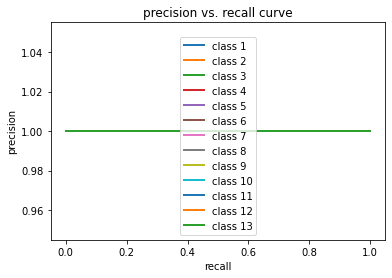

In [13]:
precision = dict()
recall = dict()
for i in range(13):
    precision[i], recall[i], _ = precision_recall_curve(y_val[:, i], y_probs[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i+1))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [14]:
df_pred = pd.read_csv("hw2_sam.csv")
df_pred

,Id,Value
0,17,0
1,18,0
2,20,0
3,21,0
4,22,0
...,...,...
895,1091,0
896,1092,0
897,1093,0
898,1094,0


In [15]:
for i in range(len(df_pred)):
    id = df_pred["Id"][i]
    pred = model.predict([TFIDF_vectors[id-1].toarray()[0]])
    df_pred["Value"][i] = pred

In [16]:
df_pred

,Id,Value
0,17,2
1,18,2
2,20,2
3,21,2
4,22,2
...,...,...
895,1091,6
896,1092,6
897,1093,6
898,1094,6


In [ ]:
df_pred.to_csv('result_SVML.csv', index = False)